# Importing Necessary Libraries for Data Analysis and Machine Learning

In [2]:
# Import libraries for data manipulation and visualization
import pandas as pd  # For handling data in tabular format
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualizing data
import seaborn as sns  # For advanced and aesthetically pleasing visualizations

# Import preprocessing tools
from sklearn.preprocessing import LabelEncoder, StandardScaler
# LabelEncoder: Encodes categorical variables into numeric labels
# StandardScaler: Standardizes features by removing the mean and scaling to unit variance

# Import library for dataset splitting
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets

# Import libraries for building and training neural networks
from tensorflow.keras.models import Sequential  # Sequential model to build neural networks layer by layer
from tensorflow.keras.layers import Dense  # Dense (fully connected) layer for neural networks

# Import linear regression and regularization methods
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# LinearRegression: For basic linear regression
# Ridge and Lasso: Regularized regression techniques to prevent overfitting

# Import XGBoost for gradient boosting
import xgboost as xgb  # A powerful gradient boosting library

# Import random forest regressor
from sklearn.ensemble import RandomForestRegressor  # Ensemble method for regression using decision trees

# Import evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Metrics for evaluating model performance:
# mean_squared_error: Measures average squared difference between predictions and actual values
# mean_absolute_error: Measures average absolute difference
# r2_score: Measures proportion of variance explained by the model

# Import feature selection tool
from sklearn.feature_selection import VarianceThreshold
# VarianceThreshold: Removes features with low variance to reduce redundancy


# Loading the Dataset into a DataFrame

In [4]:
# Load the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv(r'calories.csv')


# Checking the Dimensions of the Dataset

In [ ]:
# Get the number of rows and columns in the dataset
# This helps understand the size of the dataset
data.shape

(15000, 9)

# Retrieving Column Names of the Dataset

In [ ]:
# Display the column names of the dataset
# This provides an overview of the available features in the dataset
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

# Viewing the First Few Rows of the Dataset

In [ ]:
# Display the first 5 rows of the dataset
# This helps inspect the initial data entries and their structure
data.head(5)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Viewing Summary Statistics of the Dataset

In [ ]:
# Generate descriptive statistics of the dataset
# Includes metrics like count, mean, standard deviation, min, max, and percentiles for numeric columns
data.describe()



,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Viewing Information About the Dataset

In [ ]:
# Display information about the dataset
# Includes the data type, non-null count, and memory usage of each column
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


# Counting Unique Value Frequencies in the Dataset

In [ ]:
# Get the frequency count of unique values in the dataset
# This is useful for understanding the distribution of categorical data
data.value_counts()


<bound method DataFrame.value_counts of         User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0   

# Checking for Missing Values in the Dataset

In [ ]:
# Sum of missing values in each column of the dataset
# This helps identify columns that need handling (e.g., imputation or removal)
data.isna().sum()



User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Counting Unique Values in Each Column of the Dataset

In [ ]:
# Get the number of unique values in each column of the dataset
# This is useful to understand the cardinality of categorical features
data.nunique()



User_ID       15000
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
Calories        277
dtype: int64

# Checking Data Types of Each Column in the Dataset

In [ ]:
# Display the data types of each column in the dataset
# This helps understand how data is stored (e.g., integer, float, object, etc.)
data.dtypes


User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

# Dropping a Column from the Dataset

In [ ]:
# Drop the 'User_ID' column from the dataset
# This column may not be relevant for analysis or modeling purposes
data = data.drop(columns=['User_ID'])


# Encoding Categorical Data

In [ ]:
# Encode the 'Gender' column using LabelEncoder
# Converts categorical labels into numeric values for model compatibility
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])


# Standardizing Features for Consistent Scale

In [ ]:
# Apply StandardScaler to specific features in the dataset
# This scales the features to have a mean of 0 and variance of 1
scaler = StandardScaler()
features_to_scale = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


# Removing Duplicate Rows from the Dataset

In [ ]:
# Drop duplicate rows from the dataset
# This is important for ensuring data consistency and accuracy in analysis
data = data.drop_duplicates()


# Viewing Summary Statistics After Cleaning

In [ ]:
# Display the descriptive statistics of the dataset after cleaning (e.g., removing duplicates)
print(data.describe())


             Gender           Age        Height        Weight      Duration  \
count  14999.000000  14999.000000  14999.000000  14999.000000  14999.000000   
mean       0.496500      0.000058      0.000049      0.000071      0.000052   
std        0.500004      1.000041      1.000049      1.000029      1.000046   
min        0.000000     -1.342179     -3.609653     -2.591717     -1.746692   
25%        0.000000     -0.871028     -0.734002     -0.795926     -0.905237   
50%        0.000000     -0.223196      0.037514     -0.064307      0.056426   
75%        1.000000      0.778000      0.738893      0.800333      0.897880   
max        1.000000      2.132559      3.333993      3.793318      1.739335   

         Heart_Rate     Body_Temp      Calories  
count  14999.000000  14999.000000  14999.000000  
mean       0.000038      0.000045     89.542836  
std        1.000056      1.000052     62.457750  
min       -2.975948     -3.754413      1.000000  
25%       -0.784569     -0.546010     

# Calculating the Correlation Matrix of the Dataset

In [ ]:
# Compute the correlation matrix of the dataset
# This helps understand the relationships between different features
correlation_matrix = data.corr()


# Visualizing the Correlation Matrix with a Heatmap

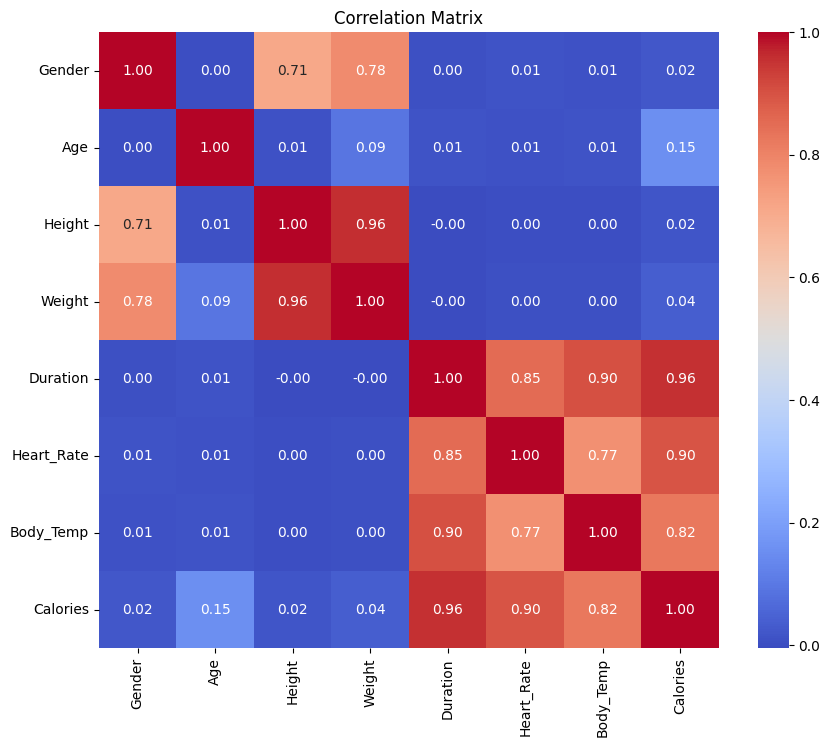

In [ ]:
# Plot a heatmap to visualize the correlation matrix
# This heatmap will help identify strong relationships between features in the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Title for the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()


# Visualizing the Distribution of Calories

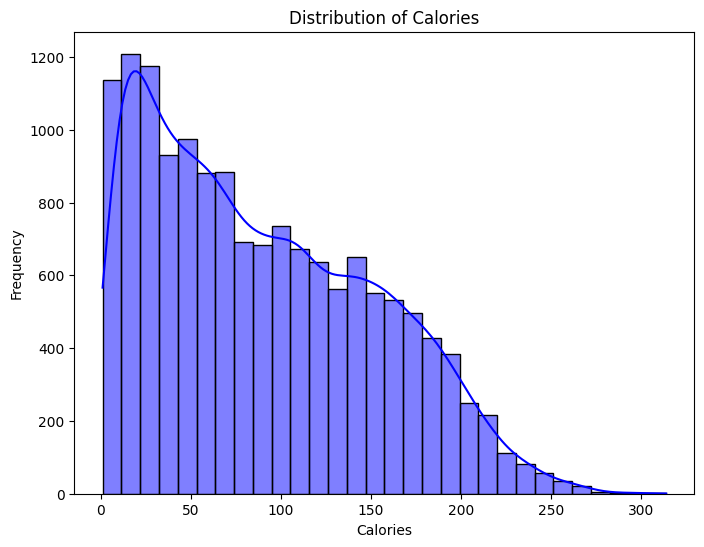

In [ ]:
# Plot a histogram with kernel density estimation to visualize the distribution of 'Calories'
# This plot helps understand the frequency distribution and density of 'Calories' in the dataset
plt.figure(figsize=(8, 6))
sns.histplot(data['Calories'], kde=True, bins=30, color='blue')

# Title and labels for the plot
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# Visualizing Boxplots for Numerical Features

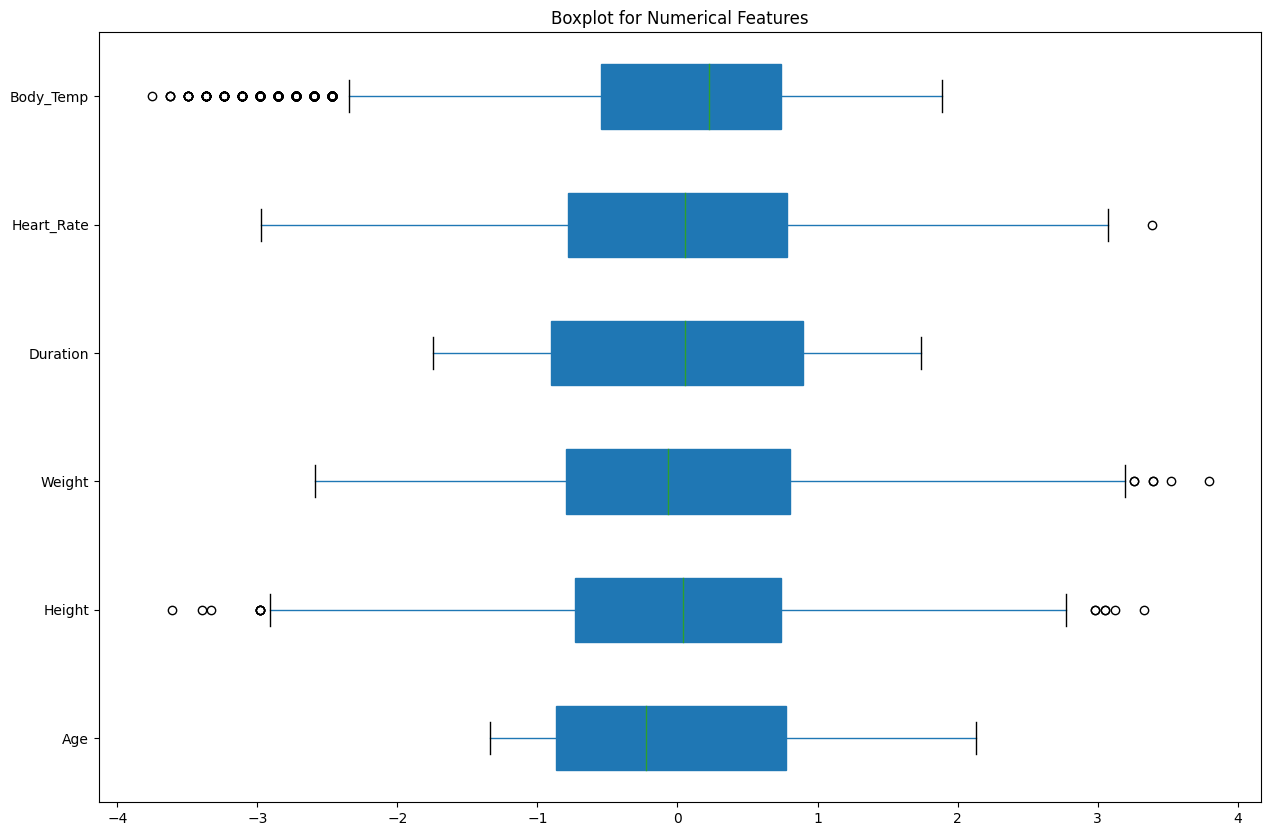

In [ ]:
# Plot boxplots for the specified numerical features to detect outliers
# This helps in understanding the spread and distribution of data within each feature
plt.figure(figsize=(15, 10))
data.boxplot(column=features_to_scale, grid=False, vert=False, patch_artist=True)

# Title for the plot
plt.title('Boxplot for Numerical Features')

# Show the plot
plt.show()


# Calculating the Body Mass Index (BMI)

In [ ]:
# Add a new column 'BMI' to the dataset
# BMI is calculated using weight (kg) / (height (m))^2
data['BMI'] = data['Weight'] / (data['Height'] ** 2)


# Applying Logarithmic Transformation to 'Calories'

In [ ]:
# Apply a logarithmic transformation to the 'Calories' column
# This can help stabilize variance and make the data distribution more normal
data['Calories'] = np.log1p(data['Calories'])



# data['Calories'] = np.expm1(data['Calories']) #This converts the log-transformed values back to the original scale


# Creating a Pairplot for Selected Features

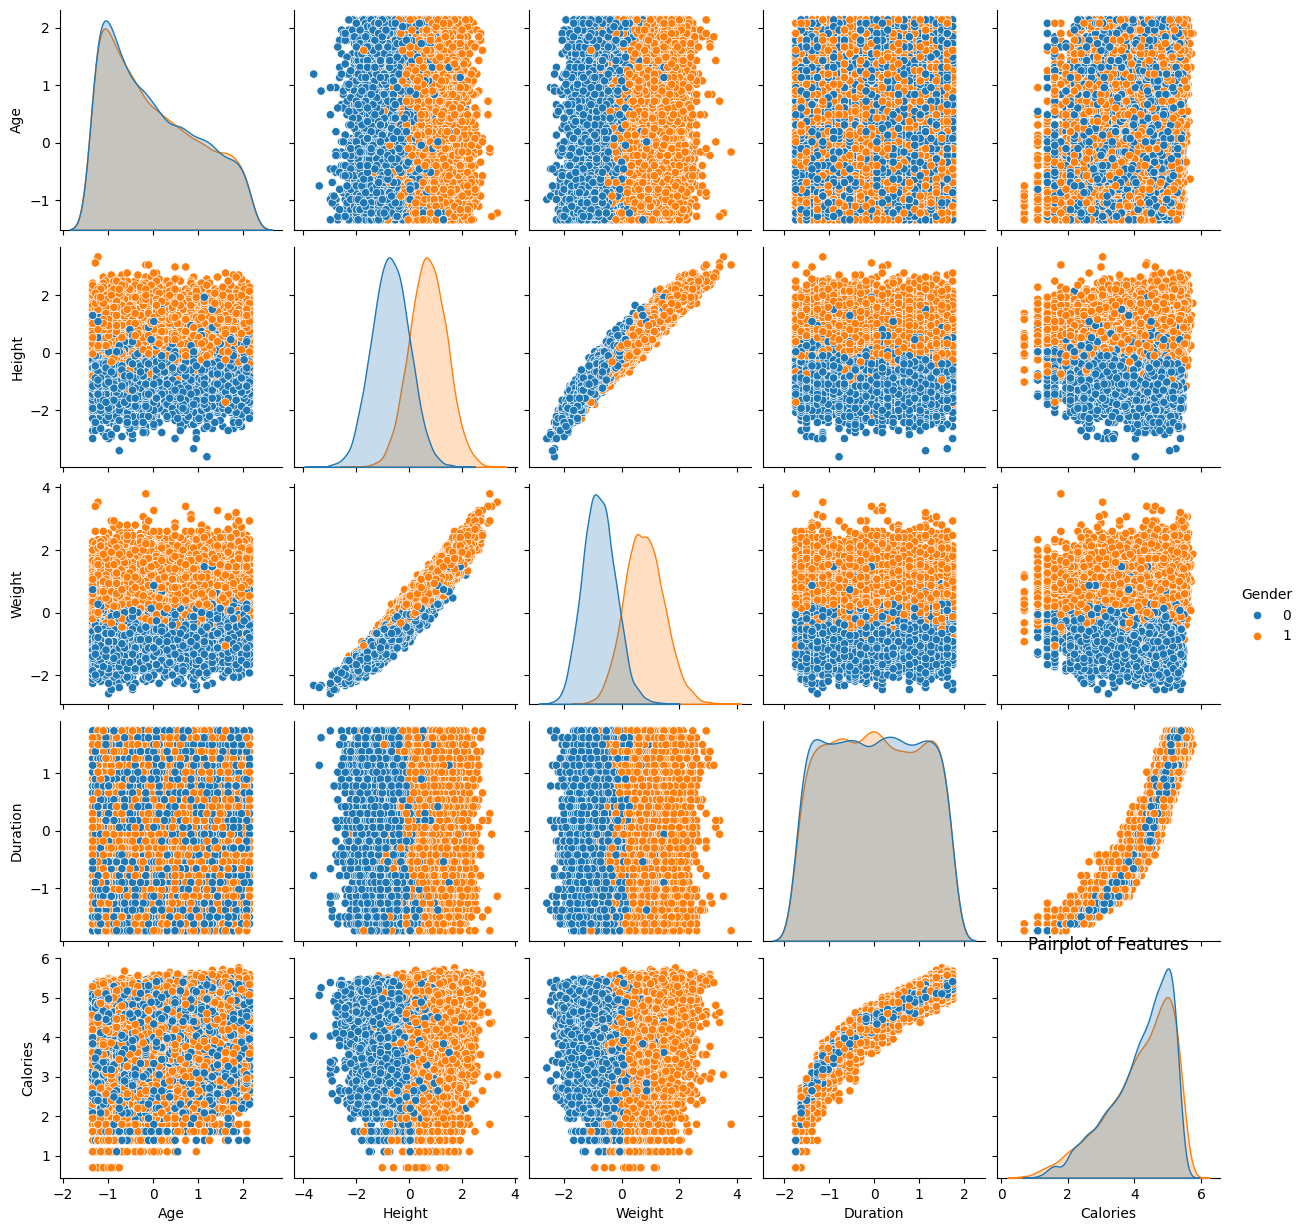

In [ ]:
# Plot a pairplot to visualize relationships between selected features, colored by 'Gender'
# This helps identify patterns and correlations between variables across different categories
sns.pairplot(data, hue='Gender', vars=['Age', 'Height', 'Weight', 'Duration', 'Calories'])
plt.title('Pairplot of Features')
plt.show()


# Visualizing Gender Counts

C:\Users\chait\AppData\Local\Temp\ipykernel_2820\3366826491.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


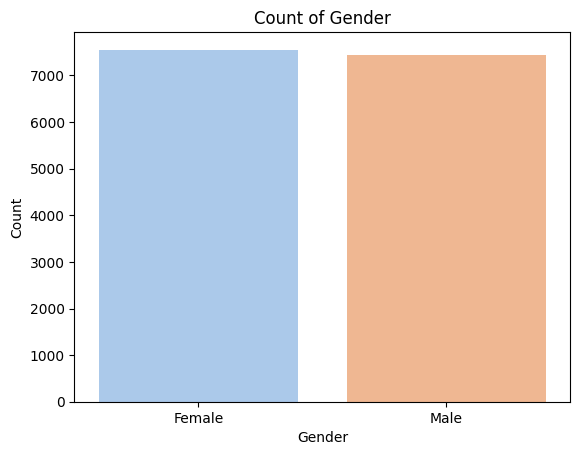

In [ ]:
# Plot a count plot for the 'Gender' column
# This shows the distribution of gender counts in the dataset using a pastel color palette
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Set x-tick labels to match gender categories
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Show the plot
plt.show()


# Scatter Plot for Duration vs Calories Burned

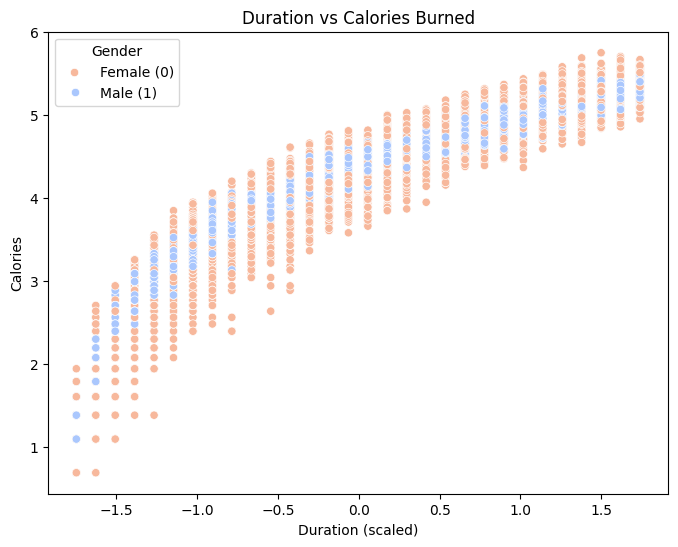

In [ ]:
# Plot a scatter plot to visualize the relationship between 'Duration' and 'Calories' burned, colored by 'Gender'
# This plot helps understand how these two variables interact and vary across different gender categories
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration', y='Calories', hue='Gender', data=data, palette='coolwarm')

# Title and labels for the plot
plt.title('Duration vs Calories Burned')
plt.xlabel('Duration (scaled)')
plt.ylabel('Calories')

# Add legend to clarify gender categories
plt.legend(title='Gender', labels=['Female (0)', 'Male (1)'])

# Show the plot
plt.show()


# Visualizing Calories Burned by Gender using a Violin Plot

C:\Users\chait\AppData\Local\Temp\ipykernel_2820\1960400136.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Calories', data=data, split=True, palette='muted')


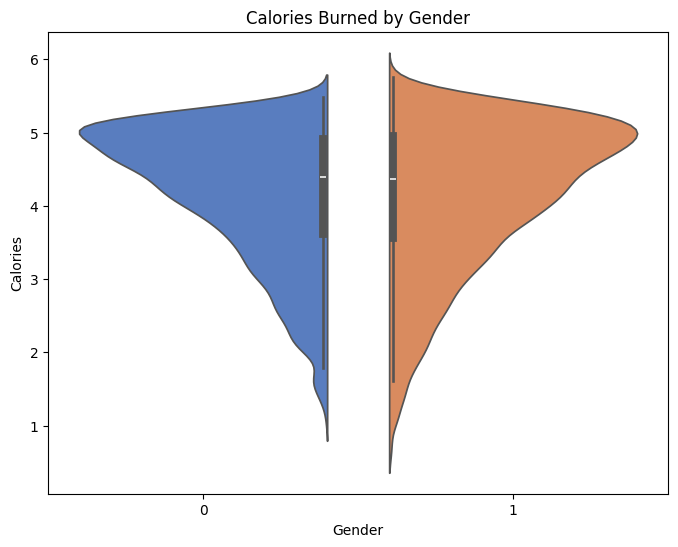

In [ ]:
# Plot a violin plot to compare the distribution of 'Calories' burned across 'Gender'
# This plot provides insight into how 'Calories' distribution differs between genders
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Calories', data=data, split=True, palette='muted')

# Title and labels for the plot
plt.title('Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories')

# Show the plot
plt.show()


# Displaying the First Few Rows of the Dataset After All Operations

In [ ]:
# Display the first few rows of the dataset to check the final transformations
print(data.head())


   Gender       Age    Height    Weight  Duration  Heart_Rate  Body_Temp  \
0       1  1.484726  1.089582  1.265909  1.619127    0.989404   0.994023   
1       0 -1.342179 -0.593726 -0.995458 -0.183990   -0.158461   0.352342   
2       1  1.543620  0.318066  0.268247 -1.265861   -0.784569  -1.701035   
3       0 -0.517665  0.318066 -0.263839 -0.304198    0.467647   0.609015   
4       0 -0.929922 -1.435380 -1.128480 -0.664821   -1.515029  -0.289338   

   Calories       BMI  
0  5.446737  1.066308  
1  4.204693 -2.823908  
2  3.295837  2.651556  
3  4.276666 -2.607989  
4  3.583519 -0.547721  


# Displaying the Sorted Correlation with 'Calories'

In [ ]:
# Sort the correlation matrix for the 'Calories' column to find the most relevant features
print(correlation_matrix['Calories'].sort_values(ascending=False))


Calories      1.000000
Body_Temp     0.940410
Duration      0.936216
Heart_Rate    0.871833
Age           0.129101
BMI           0.021717
Weight        0.005335
Height       -0.008573
Gender       -0.014570
Name: Calories, dtype: float64


# Feature Selection Using Variance Threshold

In [ ]:
# Use VarianceThreshold to filter out features with low variance (variance < 0.01)
# This helps in retaining only the most significant features for model training
selector = VarianceThreshold(threshold=0.01)

# Apply the selector on the dataset excluding the 'Calories' column
reduced_data = selector.fit_transform(data.drop(columns=['Calories']))

# Get the names of retained features
retained_features = data.drop(columns=['Calories']).columns[selector.get_support()]
print("Retained Features:", retained_features)


Retained Features: Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'BMI'],
      dtype='object')


# Splitting Features and Target Variable

In [ ]:
# Define X as the features and y as the target variable 'Calories'
# This separation is necessary for model training and testing
X = data.drop(columns=['Calories'])
y = data['Calories']


# Splitting the Dataset into Training and Testing Sets

In [ ]:
# Split the dataset into training and testing sets
# This will allow us to evaluate the model's performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training a Linear Regression Model

In [ ]:
# Initialize and train a Linear Regression model using the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

# Making Predictions with the Linear Regression Model on Test Data

In [ ]:
# Use the trained Linear Regression model to make predictions on the test dataset
y_pred_lr = lr_model.predict(X_test)


# Evaluating the Linear Regression Model

In [ ]:
# Calculate the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared value
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse_lr}')
print(f'Root Mean Squared Error: {rmse_lr}')
print(f'R-squared: {r2_lr}')


Mean Squared Error: 0.03712465152651773
Root Mean Squared Error: 0.19267758439039484
R-squared: 0.958315643815113


# Evaluating the R-squared of Linear Regression Model on Train and Test Data

In [ ]:
# Calculate R-squared for both training and testing datasets
train_r2_lr = lr_model.score(X_train, y_train)
test_r2_lr = lr_model.score(X_test, y_test)

# Print the R-squared values
print(f"Linear Regression Train R-squared: {train_r2_lr}")
print(f"Linear Regression Test R-squared: {test_r2_lr}")


Linear Regression Train R-squared: 0.9594028405776805
Linear Regression Test R-squared: 0.958315643815113


# Visualizing Actual vs Predicted Values with a Scatter Plot

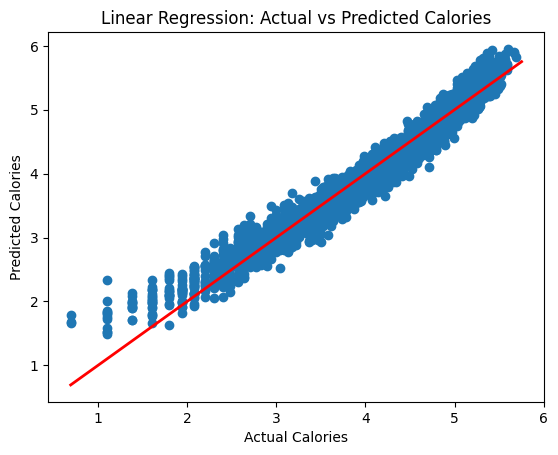

In [ ]:
# Scatter plot to compare actual vs predicted 'Calories'
# A line representing a perfect prediction (y = x) is also plotted for reference
plt.scatter(y_test, y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Linear Regression: Actual vs Predicted Calories')
plt.show()


# Training a Ridge Regression Model

In [ ]:
# Initialize and train a Ridge Regression model with a specific regularization parameter (alpha)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


Ridge()

# Evaluating the Ridge Regression Model

In [ ]:
# Use the trained Ridge Regression model to make predictions on the test dataset
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the evaluation metrics
print("Ridge Regression:")
print(f'Mean Squared Error: {mse_ridge}')
print(f'Root Mean Squared Error: {rmse_ridge}')
print(f'R-squared: {r2_ridge}')


Ridge Regression:
Mean Squared Error: 0.03712420633359593
Root Mean Squared Error: 0.1926764291074441
R-squared: 0.9583161436872886


# Evaluating the R-squared of Ridge Regression Model on Train and Test Data

In [ ]:
# Calculate R-squared for both training and testing datasets for Ridge Regression
train_r2_ridge = ridge_model.score(X_train, y_train)
test_r2_ridge = ridge_model.score(X_test, y_test)

# Print the R-squared values
print(f"Ridge Regression Train R-squared: {train_r2_ridge}")
print(f"Ridge Regression Test R-squared: {test_r2_ridge}")


Ridge Regression Train R-squared: 0.9594028334844897
Ridge Regression Test R-squared: 0.9583161436872886


# Visualizing Actual vs Predicted Values for Ridge Regression Model

Text(0, 0.5, 'Predicted Calories')

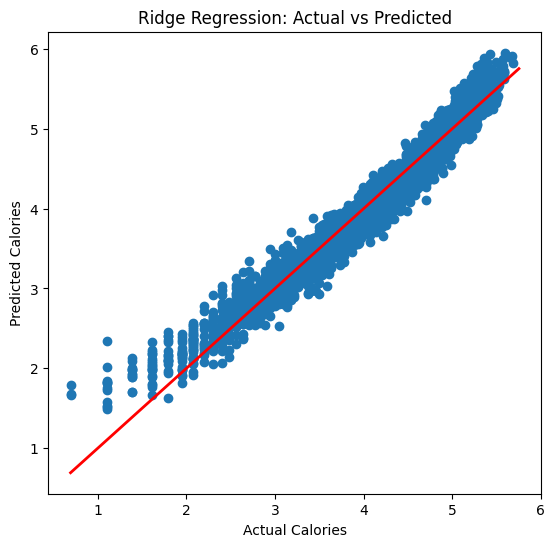

In [ ]:
# Scatter plot to compare actual vs predicted 'Calories' using Ridge Regression
# A line representing a perfect prediction (y = x) is plotted for reference
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')


# Training a Lasso Regression Model

In [ ]:
# Initialize and train a Lasso Regression model with a specific regularization parameter (alpha)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

# Evaluating the Lasso Regression Model

In [ ]:
# Use the trained Lasso Regression model to make predictions on the test dataset
y_pred_lasso = lasso_model.predict(X_test)

# Calculate evaluation metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics
print("\nLasso Regression:")
print(f'Mean Squared Error: {mse_lasso}')
print(f'Root Mean Squared Error: {rmse_lasso}')
print(f'R-squared: {r2_lasso}')



Lasso Regression:
Mean Squared Error: 0.05826723321033597
Root Mean Squared Error: 0.2413860667278374
R-squared: 0.9345762989502371


# Evaluating the R-squared of Lasso Regression Model on Train and Test Data

In [ ]:
# Calculate R-squared for both training and testing datasets for Lasso Regression
train_r2_lasso = lasso_model.score(X_train, y_train)
test_r2_lasso = lasso_model.score(X_test, y_test)

# Print the R-squared values
print(f"Lasso Regression Train R-squared: {train_r2_lasso}")
print(f"Lasso Regression Test R-squared: {test_r2_lasso}")


Lasso Regression Train R-squared: 0.9357783435450554
Lasso Regression Test R-squared: 0.9345762989502371


# Visualizing Actual vs Predicted Values for Lasso Regression Model

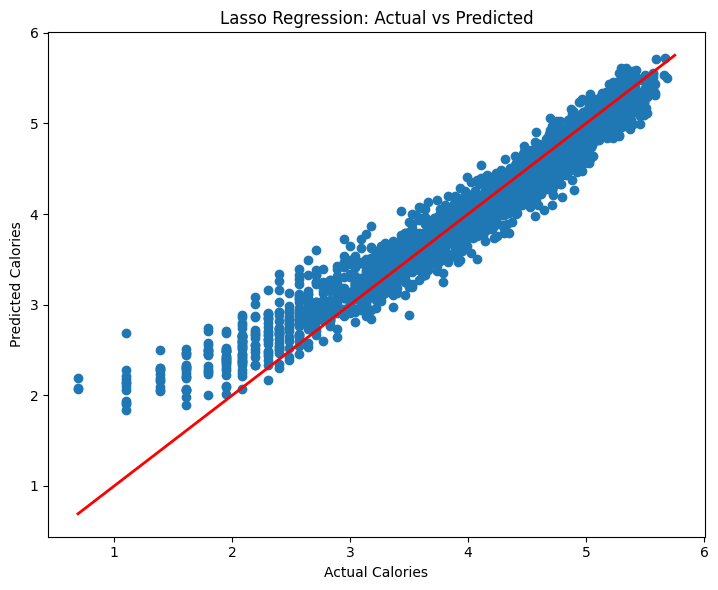

In [ ]:
# Scatter plot to compare actual vs predicted 'Calories' using Lasso Regression
# A line representing a perfect prediction (y = x) is plotted for reference
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')

plt.tight_layout()
plt.show()


# Building a Neural Network Model

In [ ]:
# Initialize a Sequential model for an Artificial Neural Network (ANN)
ann_model = Sequential()

# Input layer with 64 units and ReLU activation
ann_model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer with 32 units and ReLU activation
ann_model.add(Dense(units=32, activation='relu'))

# Output layer with 1 unit (for regression task)
ann_model.add(Dense(units=1))


# Compiling the Neural Network Model

In [ ]:
# Compile the ANN model
# Using Adam optimizer and Mean Squared Error as the loss function
ann_model.compile(optimizer='adam', loss='mean_squared_error')


# Training the Neural Network Model

In [ ]:
# Fit the ANN model on the training data
# Using 50 epochs and a batch size of 32
# Validation data is provided to monitor performance on test data
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 5.4864 - val_loss: 0.4280
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4820 - val_loss: 0.2190
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.7180 - val_loss: 0.5051
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.5741 - val_loss: 3.2733
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.6549 - val_loss: 0.1499
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4475
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1545 - val_loss: 0.0608
Epoch 8/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1174 - val_loss: 0.9476
Epoch 9/50
375/375 [==============================] - 1s 2ms/step - loss: 1.2965 - val_loss: 0.0852
Epoch 10/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0505 - val_loss: 0.0400

# Making Predictions with the ANN Model on Test Data

In [ ]:
# Use the trained ANN model to make predictions on the test dataset
y_pred_ann = ann_model.predict(X_test)


94/94 [==============================] - 0s 1ms/step


# Evaluating the ANN Regression Model

In [ ]:
# Calculate evaluation metrics for the ANN model: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_test, y_pred_ann)

# Print the evaluation metrics
print("ANN Regression:")
print(f'Mean Squared Error: {mse_ann}')
print(f'Root Mean Squared Error: {rmse_ann}')
print(f'R-squared: {r2_ann}')


ANN Regression:
Mean Squared Error: 0.01489068177838541
Root Mean Squared Error: 0.12202738126496614
R-squared: 0.9832804226420103


# Calculating R-squared for ANN on Train and Test Data

In [127]:

# Predict on training data
y_train_pred = ann_model.predict(X_train)
train_r2_ann = r2_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = ann_model.predict(X_test)
test_r2_ann = r2_score(y_test, y_test_pred)

# Print R-squared values for ANN
print(f"Train R-squared (ANN): {train_r2_ann}")
print(f"Test R-squared (ANN): {test_r2_ann}")

94/94 [==============================] - 0s 963us/step
Train R-squared (ANN): 0.9848582495608009
Test R-squared (ANN): 0.9832804226420103


# Visualizing Actual vs Predicted Values for ANN Regression Model

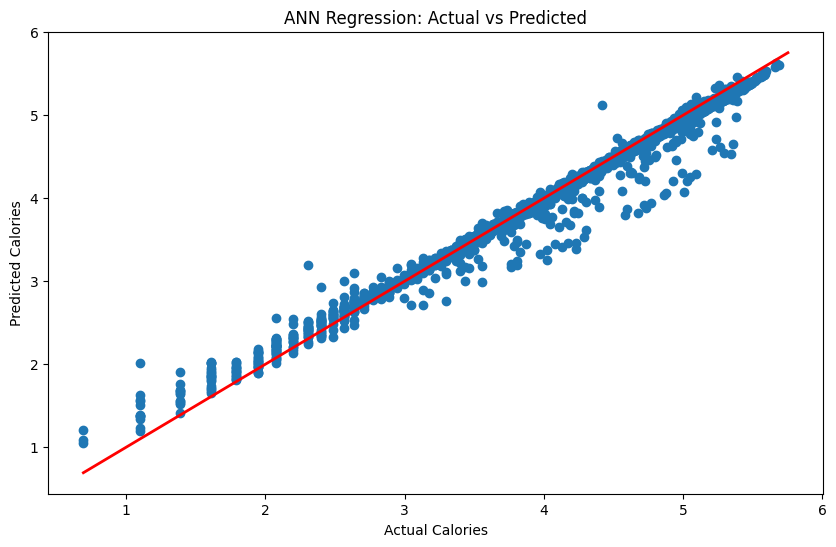

In [ ]:
# Scatter plot to compare actual vs predicted 'Calories' using ANN Regression
# A line representing a perfect prediction (y = x) is plotted for reference
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ann)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('ANN Regression: Actual vs Predicted')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()


# Plotting the Loss Curve

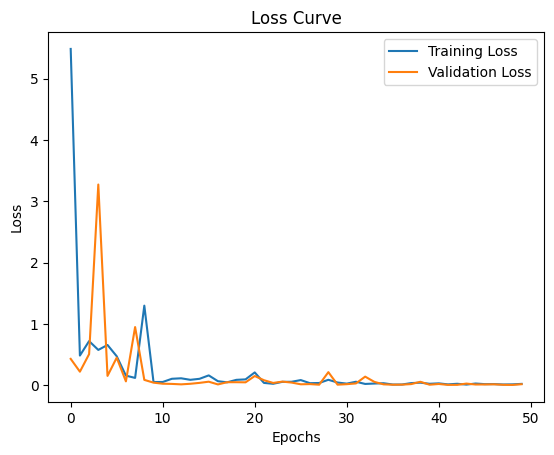

In [ ]:
# Plot the training and validation loss over epochs to visualize model performance
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Initializing a Random Forest Regressor

In [ ]:
# Create a RandomForestRegressor model with 100 decision trees and a fixed random state for reproducibility
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


# Fitting the Random Forest Regressor


In [ ]:
# Train the Random Forest Regressor on the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Evaluating the Random Forest Regressor Performance

In [ ]:
# Predict using the Random Forest Regressor
y_pred_rf = rf_regressor.predict(X_test)

# Calculate performance metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the performance metrics
print("Random Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")


Random Forest Regressor Performance:
Mean Squared Error: 0.0017699740752975663
Root Mean Squared Error: 0.04207105983092851
Mean Absolute Error: 0.02647973752888644
R-squared: 0.998012635088574


# Calculating R-squared for Random Forest Regressor on Train and Test Data

In [ ]:
# Calculate the R-squared for training and testing data
train_r2_rf = rf_regressor.score(X_train, y_train)
test_r2_rf = rf_regressor.score(X_test, y_test)

# Print the R-squared values
print(f"Train R-squared: {train_r2_rf}")
print(f"Test R-squared: {test_r2_rf}")


Train R-squared: 0.9997115838871804
Test R-squared: 0.998012635088574


# Visualizing Actual vs Predicted Values for Random Forest Regression Model

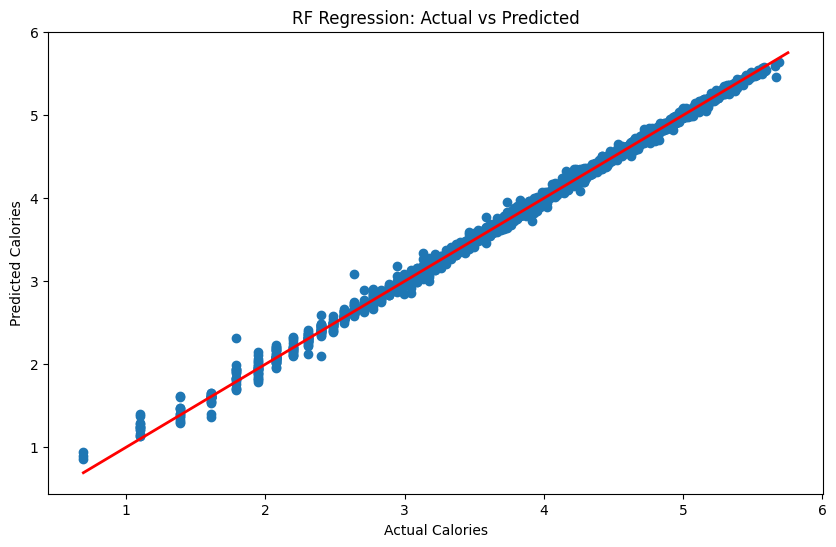

In [ ]:
# Scatter plot to compare actual vs predicted 'Calories' using Random Forest Regression
# A line representing a perfect prediction (y = x) is plotted for reference
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('RF Regression: Actual vs Predicted')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()


# Visualizing Feature Importance of Random Forest Regressor

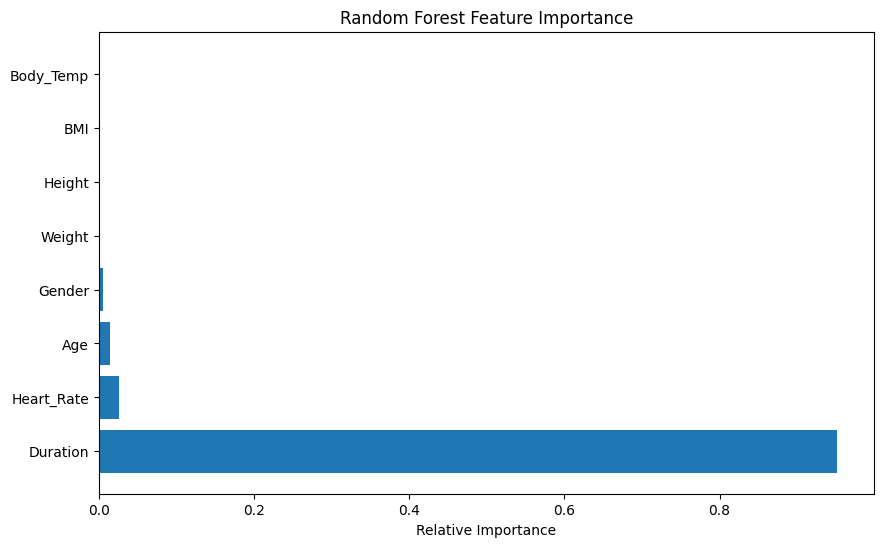

In [ ]:
# Compute the feature importances and plot them in descending order
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


# Initializing XGBoost Regressor with Configuration

In [ ]:
# Initialize the XGBoost Regressor
# 'objective' parameter set to 'reg:squarederror' for regression tasks
# 'n_estimators' set to 100 for the number of boosting rounds
# 'random_state' set for reproducibility
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)


# Fitting the XGBoost Regressor Model

In [ ]:
# Train the XGBoost Regressor model using the training data
xg_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Evaluating the XGBoost Regressor Model Performance

In [ ]:
# Predict using the trained XGBoost Regressor model on test data
y_pred_xgb = xg_reg.predict(X_test)

# Calculate performance metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Performance:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"Root Mean Squared Error: {rmse_xgb}")
print(f"Mean Absolute Error: {mae_xgb}")
print(f"R-squared: {r2_xgb}")


XGBoost Regressor Performance:
Mean Squared Error: 0.0012880208199213146
Root Mean Squared Error: 0.035889006950893955
Mean Absolute Error: 0.02375297698543352
R-squared: 0.9985537825562403


# XGBoost Regression R-squared Values

In [ ]:
# Calculate R-squared values for XGBoost model on train and test data
train_r2_xgb = xg_reg.score(X_train, y_train)
test_r2_xgb = xg_reg.score(X_test, y_test)

print(f"XGBoost Train R-squared: {train_r2_xgb}")
print(f"XGBoost Test R-squared: {test_r2_xgb}")



XGBoost Train R-squared: 0.9995941136675283
XGBoost Test R-squared: 0.9985537825562403


# Plotting Actual vs Predicted Calories for XGB Regression

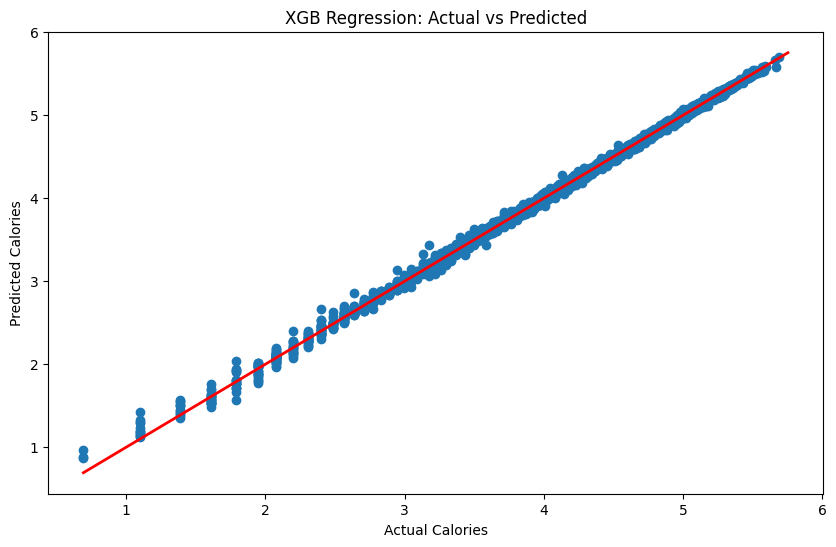

In [ ]:
plt.figure(figsize=(10, 6))
# Create a scatter plot of the actual vs predicted values for calories
plt.scatter(y_test, y_pred_xgb)
# Add a line representing the perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('XGB Regression: Actual vs Predicted')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()


# Plotting XGBoost Feature Importance

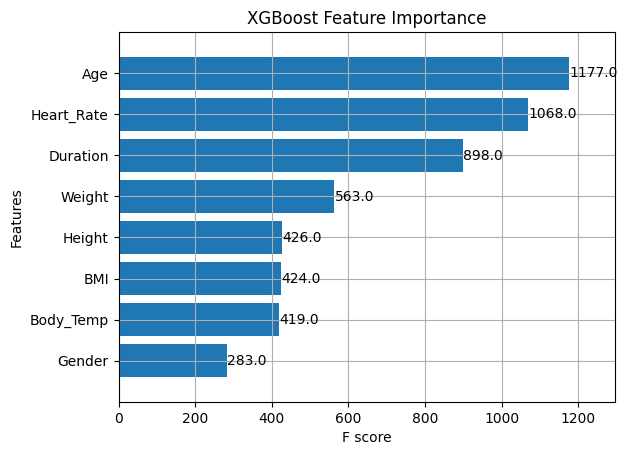

In [ ]:
xgb.plot_importance(xg_reg, importance_type='weight', max_num_features=10, height=0.8)
# Plot the importance of the features used in the XGBoost model
plt.title("XGBoost Feature Importance")
plt.show()


# Plotting Comparison of Models with R-squared values

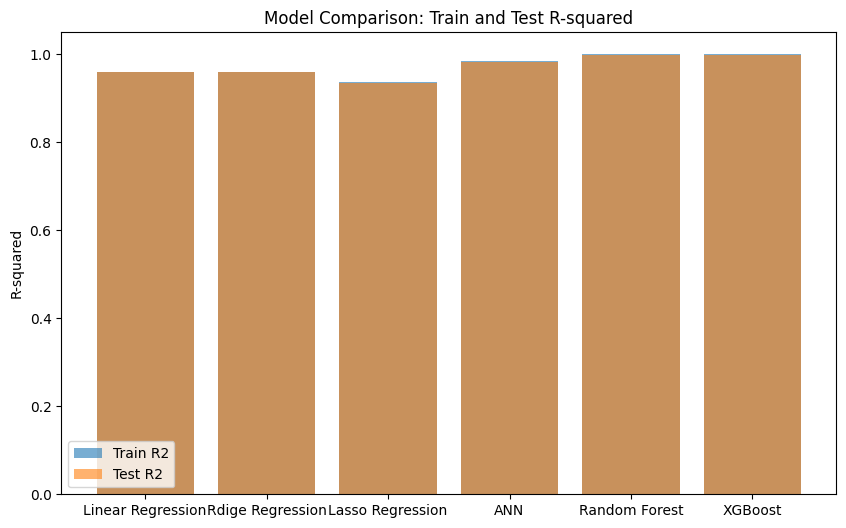

In [ ]:
models = ['Linear Regression','Rdige Regression','Lasso Regression','ANN', 'Random Forest', 'XGBoost']
r2_values = [train_r2_lr,train_r2_ridge,train_r2_lasso,train_r2_ann, train_r2_rf, train_r2_xgb]
test_r2_values = [test_r2_lr,test_r2_ridge,test_r2_lasso,test_r2_ann, test_r2_rf, test_r2_xgb]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, alpha=0.6, label="Train R2")
plt.bar(models, test_r2_values, alpha=0.6, label="Test R2")
# Plotting bars for train and test R-squared values side by side for each model
plt.title("Model Comparison: Train and Test R-squared")
plt.ylabel("R-squared")
plt.legend(loc='lower left')
plt.show()
